In [4]:
import pandas as pd
heart_data = pd.read_csv('heart_disease.csv')

In [5]:
import pandas as pd
file_path = 'heart_disease.csv'
heart_data = pd.read_csv(file_path)
heart_data.head()
print(heart_data.isnull().sum())


HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                1
PhysHlth                1
DiffWalk                1
Sex                     1
Age                     1
Education               1
Income                  1
dtype: int64


In [6]:
heart_data.fillna(heart_data.median(), inplace=True)
print(heart_data.isnull().sum())


HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [7]:
from sklearn.preprocessing import StandardScaler
X = heart_data.drop('HeartDiseaseorAttack', axis=1)
y = heart_data['HeartDiseaseorAttack']
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [9]:
from sklearn.model_selection import train_test_split
# Split the data into training (80%) and testing sets (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (131024, 21)
Testing set size: (32757, 21)


In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
# Input layer and Hidden layer 1 (32 neurons, ReLU activation)
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
# Hidden layer 2 (16 neurons, ReLU activation)
model.add(Dense(16, activation='relu'))
# Output layer (for binary classification, we use 1 neuron with sigmoid activation)
model.add(Dense(1, activation='sigmoid'))
# Compile the model (using Adam optimizer and binary crossentropy loss)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)


Epoch 1/50
3276/3276 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9039 - loss: 0.2660 - val_accuracy: 0.9086 - val_loss: 0.2398
Epoch 2/50
3276/3276 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9088 - loss: 0.2364 - val_accuracy: 0.9083 - val_loss: 0.2387
Epoch 3/50
3276/3276 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9073 - loss: 0.2366 - val_accuracy: 0.9090 - val_loss: 0.2376
Epoch 4/50
3276/3276 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9100 - loss: 0.2337 - val_accuracy: 0.9083 - val_loss: 0.2377
Epoch 5/50
3276/3276 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9094 - loss: 0.2331 - val_accuracy: 0.9085 - val_loss: 0.2380
Epoch 6/50
3276/3276 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9101 - loss: 0.2335 - val_accuracy: 0.9094 - val_loss: 0.2375
Epoch 7/50
3276/3276 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9106 - loss: 0.2306 - val_accuracy: 0.9089 - val_loss: 0.2376
Epoch 8/50
3276/3276 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9109 - loss: 0.2314 

In [12]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')


1024/1024 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9074 - loss: 0.2379
Test Accuracy: 0.9072870016098022


In [13]:
from sklearn.metrics import confusion_matrix, classification_report
# Predict on test data
y_pred = (model.predict(X_test) > 0.5).astype("int32")
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Classification report (including precision, recall, and F1-score)
print(classification_report(y_test, y_pred))


1024/1024 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[[29390   415]
 [ 2622   330]]
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     29805
         1.0       0.44      0.11      0.18      2952

    accuracy                           0.91     32757
   macro avg       0.68      0.55      0.56     32757
weighted avg       0.88      0.91      0.88     32757



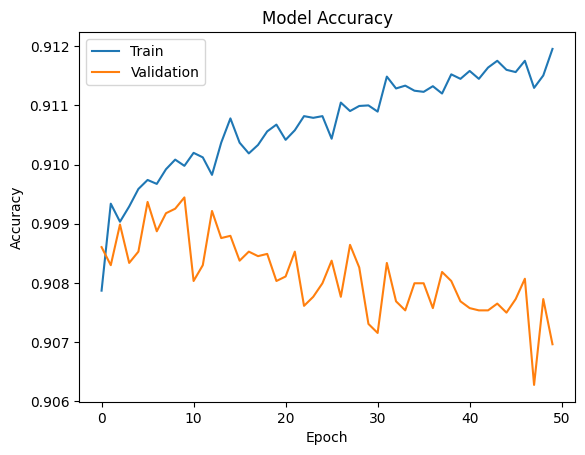

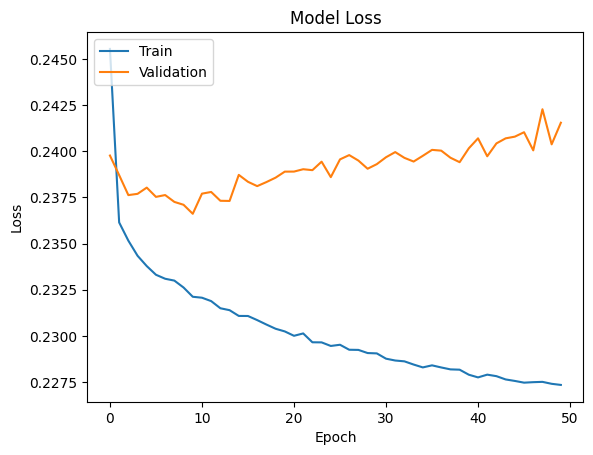

In [14]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [21]:
!pip install tensorflow

In [25]:
!pip install --upgrade tensorflow

In [26]:
!pip install scikit-learn keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 5.8 MB/s eta 0:00:00


In [29]:
!pip install keras-tuner

In [33]:
!pip install tensorflow scikit-learn

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, ClassifierMixin
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
data = pd.read_csv('heart_disease.csv')

# Separate features and target variable
X = data.drop(columns=['HeartDiseaseorAttack'])
y = data['HeartDiseaseorAttack']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Custom KerasClassifier wrapper
class KerasClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, build_fn=None, epochs=10, batch_size=32, verbose=0, optimizer='adam'):
        self.build_fn = build_fn
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose
        self.optimizer = optimizer

    def fit(self, X, y):
        self.model = self.build_fn(optimizer=self.optimizer)
        early_stopping = EarlyStopping(monitor='loss', patience=3, verbose=self.verbose)  # Early stopping
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=self.verbose, callbacks=[early_stopping])
        return self

    def predict(self, X):
        return (self.model.predict(X) > 0.5).astype("int32")

    def score(self, X, y):
        _, accuracy = self.model.evaluate(X, y, verbose=0)
        return accuracy

# Function to create the model
def create_model(optimizer='adam'):
    model = Sequential()
    model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrap the Keras model in our custom KerasClassifier
keras_clf = KerasClassifier(build_fn=create_model, epochs=50, batch_size=32, verbose=1)

# Reduced parameter grid for quick testing
param_grid = {
    'epochs': [10],  # Test only 10 epochs for initial testing
    'batch_size': [32],  # Test with batch size of 32
    'optimizer': ['adam']  # Test with only the 'adam' optimizer
}

# Use 2-fold cross-validation for quicker results
grid = GridSearchCV(estimator=keras_clf, param_grid=param_grid, n_jobs=-1, cv=2)

# Perform grid search
grid_result = grid.fit(X_train, y_train)

# Print the best result
print(f'Best Accuracy: {grid_result.best_score_} with parameters: {grid_result.best_params_}')


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4095/4095 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9043 - loss: 0.2625
Epoch 2/10
4095/4095 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9084 - loss: 0.2381
Epoch 3/10
4095/4095 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9083 - loss: 0.2360
Epoch 4/10
4095/4095 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9100 - loss: 0.2340
Epoch 5/10
4095/4095 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9086 - loss: 0.2356
Epoch 6/10
4095/4095 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9099 - loss: 0.2338
Epoch 7/10
4095/4095 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9098 - loss: 0.2332
Epoch 8/10
4095/4095 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9099 - loss: 0.2308
Epoch 9/10
4095/4095 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9093 - loss: 0.2351
Epoch 10/10
4095/4095 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9093 - loss: 0.2357
Best Accuracy: 0.9081237018108368 with parameters: {'batch_size': 32, 'epochs': 10, 'optimizer': 'adam'}


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4095/4095 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8983 - loss: 0.2702
Epoch 2/10
4095/4095 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9094 - loss: 0.2358
Epoch 3/10
4095/4095 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9093 - loss: 0.2349
Epoch 4/10
4095/4095 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9090 - loss: 0.2341
Epoch 5/10
4095/4095 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9126 - loss: 0.2285
Epoch 6/10
4095/4095 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9100 - loss: 0.2319
Epoch 7/10
4095/4095 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9101 - loss: 0.2333
Epoch 8/10
4095/4095 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9104 - loss: 0.2309
Epoch 9/10
4095/4095 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9107 - loss: 0.2315
Epoch 10/10
4095/4095 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9098 - loss: 0.2326
Best Accuracy: 0.9085739850997925 with parameters: {'batch_size': 32, 'epochs': 10, 'optimizer': 'adam'}
1024/1024 ━━━━━━━━━━━━

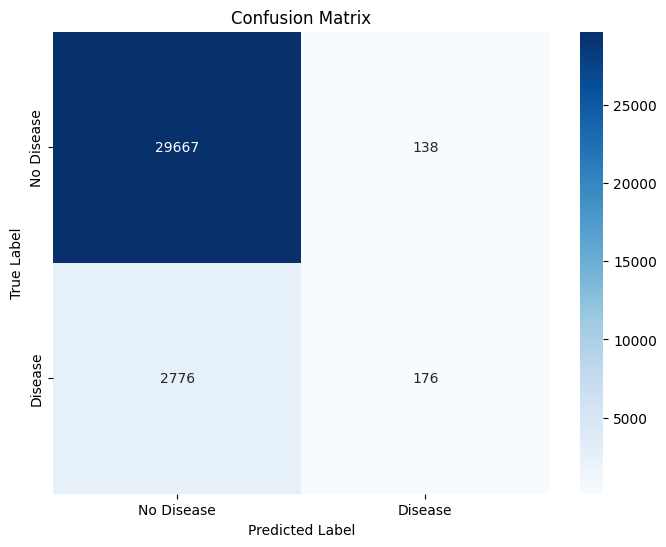

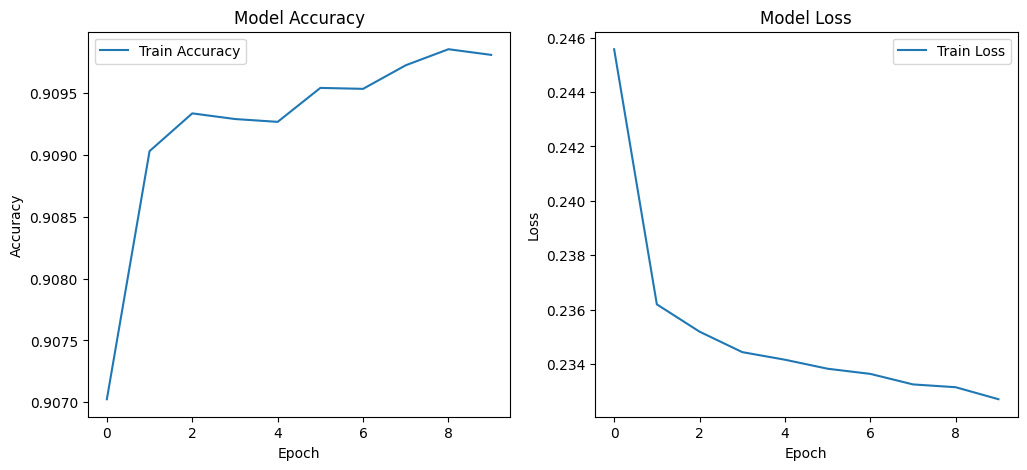

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, ClassifierMixin
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('heart_disease.csv')

# Separate features and target variable
X = data.drop(columns=['HeartDiseaseorAttack'])
y = data['HeartDiseaseorAttack']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Custom KerasClassifier wrapper
class KerasClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, build_fn=None, epochs=10, batch_size=32, verbose=0, optimizer='adam'):
        self.build_fn = build_fn
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose
        self.optimizer = optimizer
        self.history = None  # To store the training history

    def fit(self, X, y):
        self.model = self.build_fn(optimizer=self.optimizer)
        early_stopping = EarlyStopping(monitor='loss', patience=3, verbose=self.verbose)  # Early stopping
        self.history = self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size,
                                      verbose=self.verbose, callbacks=[early_stopping])
        return self

    def predict(self, X):
        return (self.model.predict(X) > 0.5).astype("int32")

    def score(self, X, y):
        _, accuracy = self.model.evaluate(X, y, verbose=0)
        return accuracy

# Function to create the model
def create_model(optimizer='adam'):
    model = Sequential()
    model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrap the Keras model in our custom KerasClassifier
keras_clf = KerasClassifier(build_fn=create_model, epochs=50, batch_size=32, verbose=1)

# Reduced parameter grid for quick testing
param_grid = {
    'epochs': [10],  # Test only 10 epochs for initial testing
    'batch_size': [32],  # Test with batch size of 32
    'optimizer': ['adam']  # Test with only the 'adam' optimizer
}

# Use 2-fold cross-validation for quicker results
grid = GridSearchCV(estimator=keras_clf, param_grid=param_grid, n_jobs=-1, cv=2)

# Perform grid search
grid_result = grid.fit(X_train, y_train)

# Print the best result
print(f'Best Accuracy: {grid_result.best_score_} with parameters: {grid_result.best_params_}')

# Predict on the test set
y_pred = grid.predict(X_test)

# Evaluate the model on the test set
print(classification_report(y_test, y_pred))

# Confusion Matrix
confusion_mtx = confusion_matrix(y_test, y_pred)

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Plotting the Training History
# Access the last fit model to get the history
history = grid_result.best_estimator_.history

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()
